<a href="https://colab.research.google.com/github/fedderw/uk-ubi-regional-maps/blob/main/UK_UBI_Regional_Choropleth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install correct version of plotly
!pip install plotly==4.13.0
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express
# Install contextily to make our map
!pip install contextily

!pip install plotly-geo==1.0.0
!pip install dash==1.17.0

import contextily as ctx
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium

# plotly
import plotly_express as px
import plotly.graph_objects as go
# from plotly import graph_objects as go



import statsmodels.api as sm 
import seaborn as sns

     |████████████████████████████████| 13.1MB 320kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 14 not upgraded.
Need to

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# UK

# Import Nikhil's ubi_regions data

I don't know why it makes me enter credentials both times here, I need to upload this stuff to github or something.

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
file = "https://docs.google.com/spreadsheets/d/1MD_7gNQYXmz-_7jNPpk_L-lLB7GgtLW1tBZrFelL0ik/edit?usp=sharing"

# open workbook by url
wb = gc.open_by_url(file)
# call first sheet
sheet = wb.sheet1
# get values from sheet object
data = sheet.get_all_values()

uk = pd.DataFrame(data)
uk.columns = uk.iloc[0]
uk = uk.iloc[1:]

uk.head()

,region_name,adults_in_household,children_in_household,country,household_equivalisation_ahc,household_equivalisation_bhc,household_id,household_weight,in_poverty_ahc,in_poverty_bhc,people_in_household,region,seniors_in_household,working_age_adults_in_household,council_tax,housing_costs,housing_type,is_rented,is_shared,is_social,mortgage,num_rooms,rent,weekly_rent,equiv_household_net_income,equiv_household_net_income_ahc,household_earnings,household_income,household_net_income,household_net_income_ahc,household_basic_income
1,EAST_MIDLANDS,1.765163297,0.5264385692,0,0.9453344,0.97507775,1097335.459,1556.1843,0.09020217729,0.09797822706,2.291601866,3,0.50155521,1.267496112,1407.4058,60.281494,1,0,0.00933125972,0.1811819596,0,5.619751166,36.85148,0,31475.969,29537.203,26490.725,31881.984,31016.275,27902.057,281.4347
2,EAST_OF_ENGLAND,1.763500931,0.4854127871,0,0.9344134,0.9647486,1096434.24,1599.6772,0.09248913718,0.08566108007,2.248913718,5,0.5437616387,1.227188082,1554.0565,75.962135,1,0,0.004965859714,0.1626319056,0,5.540657976,43.46431,0,34265.848,31697.924,31410.242,37668.24,33325.742,29397.37,279.03476
3,LONDON,1.880077369,0.6750483559,0,0.9417408,0.9776015,1095200.471,2268.6707,0.16827853,0.110896196,2.555125725,6,0.3488072211,1.549967763,1599.5667,154.00064,1,0,0.01418439716,0.2566086396,0,4.642166344,115.067696,0,41817.69,35981.836,44744.92,48651.914,40440.273,32769.07,298.47678
4,NORTHERN_IRELAND,1.702032722,0.5532969757,0,0.92805153,0.96223104,1097263.114,363.69708,0.05057015369,0.06147744175,2.255329698,11,0.4496777392,1.270699058,0,43.78086,1,0,0.005949429846,0.1641051066,0,5.918691125,31.010412,0,31586.36,30767.943,22867.264,26461.719,30543.742,28272.049,277.49753
5,NORTH_EAST,1.671794872,0.5128205128,0,0.904359,0.94128203,1093567.859,1489.4166,0.1205128205,0.1064102564,2.184615385,0,0.4717948718,1.207692308,1273.2363,59.735897,1,0,0.005128205128,0.2487179487,0,5.346153846,37.964104,0,29604.121,27737.312,21515.45,25803.982,28021.39,24925.527,267.13943


In [ ]:
uk.head(12)

,region_name,adults_in_household,children_in_household,country,household_equivalisation_ahc,household_equivalisation_bhc,household_id,household_weight,in_poverty_ahc,in_poverty_bhc,people_in_household,region,seniors_in_household,working_age_adults_in_household,council_tax,housing_costs,housing_type,is_rented,is_shared,is_social,mortgage,num_rooms,rent,weekly_rent,equiv_household_net_income,equiv_household_net_income_ahc,household_earnings,household_income,household_net_income,household_net_income_ahc,household_basic_income
1,EAST_MIDLANDS,1.765163297,0.5264385692,0,0.9453344,0.97507775,1097335.459,1556.1843,0.09020217729,0.09797822706,2.291601866,3,0.50155521,1.267496112,1407.4058,60.281494,1,0,0.00933125972,0.1811819596,0,5.619751166,36.85148,0,31475.969,29537.203,26490.725,31881.984,31016.275,27902.057,281.4347
2,EAST_OF_ENGLAND,1.763500931,0.4854127871,0,0.9344134,0.9647486,1096434.24,1599.6772,0.09248913718,0.08566108007,2.248913718,5,0.5437616387,1.227188082,1554.0565,75.962135,1,0,0.004965859714,0.1626319056,0,5.540657976,43.46431,0,34265.848,31697.924,31410.242,37668.24,33325.742,29397.37,279.03476
3,LONDON,1.880077369,0.6750483559,0,0.9417408,0.9776015,1095200.471,2268.6707,0.16827853,0.110896196,2.555125725,6,0.3488072211,1.549967763,1599.5667,154.00064,1,0,0.01418439716,0.2566086396,0,4.642166344,115.067696,0,41817.69,35981.836,44744.92,48651.914,40440.273,32769.07,298.47678
4,NORTHERN_IRELAND,1.702032722,0.5532969757,0,0.92805153,0.96223104,1097263.114,363.69708,0.05057015369,0.06147744175,2.255329698,11,0.4496777392,1.270699058,0,43.78086,1,0,0.005949429846,0.1641051066,0,5.918691125,31.010412,0,31586.36,30767.943,22867.264,26461.719,30543.742,28272.049,277.49753
5,NORTH_EAST,1.671794872,0.5128205128,0,0.904359,0.94128203,1093567.859,1489.4166,0.1205128205,0.1064102564,2.184615385,0,0.4717948718,1.207692308,1273.2363,59.735897,1,0,0.005128205128,0.2487179487,0,5.346153846,37.964104,0,29604.121,27737.312,21515.45,25803.982,28021.39,24925.527,267.13943
6,NORTH_WEST,1.692509167,0.5385018334,0,0.9135883,0.9502672,1095986.307,1635.5935,0.1126244107,0.1079099005,2.231011001,1,0.4724986904,1.233106338,1340.984,63.137245,1,0,0.004190675746,0.2006286014,0,5.395495024,38.434258,0,30473.033,28565.438,24508.559,28213.482,29011.6,25743.836,272.7017
7,SCOTLAND,1.67877292,0.4079689704,0,0.891622,0.929323,1094966.756,876.8865,0.1103667137,0.1191819464,2.08674189,10,0.4869534556,1.189703808,1600.9426,53.461567,1,0,0.007404795487,0.230606488,0,5.034555712,33.046192,0,30674.469,29225.07,25453.404,30319.781,29005.951,26234.758,258.82846
8,SOUTH_EAST,1.763107722,0.503336511,0,0.94613916,0.97402287,1094484.49,1797.6587,0.111534795,0.08674928503,2.266444233,7,0.5486177312,1.224022879,1694.9972,89,1,0,0.01096282173,0.1363203051,0,5.628693994,49.920876,0,41343.18,38227.13,45985.58,53368.445,41031.258,36659.164,281.11
9,SOUTH_WEST,1.720727273,0.4945454545,0,0.9377018,0.96800727,1095066.778,1744.5796,0.1090909091,0.1076363636,2.215272727,8,0.576,1.157818182,1558.6366,65.583275,1,0,0.002909090909,0.1309090909,0,5.664727273,36.21091,0,31577.922,29549.992,25126.078,32359.854,30712.123,27364.895,277.67728
10,WALES,1.683649289,0.4585308057,0,0.9036493,0.9394787,1095105.237,1606.9502,0.1338862559,0.1244075829,2.142180095,9,0.5367298578,1.154028436,1572.1465,54.57583,1,0,0.001184834123,0.1753554502,0,5.643364929,32.27014,0,29208.492,27613.242,21311.115,25850.395,27746.818,24917.23,267.52814


In [ ]:
uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 1 to 12
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   region_name                      12 non-null     object
 1   adults_in_household              12 non-null     object
 2   children_in_household            12 non-null     object
 3   country                          12 non-null     object
 4   household_equivalisation_ahc     12 non-null     object
 5   household_equivalisation_bhc     12 non-null     object
 6   household_id                     12 non-null     object
 7   household_weight                 12 non-null     object
 8   in_poverty_ahc                   12 non-null     object
 9   in_poverty_bhc                   12 non-null     object
 10  people_in_household              12 non-null     object
 11  region                           12 non-null     object
 12  seniors_in_household             12 no

In [ ]:
num_cols = [
#  'region_name',
 'adults_in_household',
 'children_in_household',
#  'country',
 'household_equivalisation_ahc',
 'household_equivalisation_bhc',
 'household_id',
 'household_weight',
 'in_poverty_ahc',
 'in_poverty_bhc',
 'people_in_household',
#  'region',
 'seniors_in_household',
 'working_age_adults_in_household',
 'council_tax',
 'housing_costs',
#  'housing_type',
 'is_rented',
 'is_shared',
 'is_social',
 'mortgage',
 'num_rooms',
 'rent',
 'weekly_rent',
 'equiv_household_net_income',
 'equiv_household_net_income_ahc',
 'household_earnings',
 'household_income',
 'household_net_income',
 'household_net_income_ahc',
 'household_basic_income']

for col in num_cols:
  uk[col]=uk[col].astype('float')

uk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 1 to 12
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   region_name                      12 non-null     object 
 1   adults_in_household              12 non-null     float64
 2   children_in_household            12 non-null     float64
 3   country                          12 non-null     object 
 4   household_equivalisation_ahc     12 non-null     float64
 5   household_equivalisation_bhc     12 non-null     float64
 6   household_id                     12 non-null     float64
 7   household_weight                 12 non-null     float64
 8   in_poverty_ahc                   12 non-null     float64
 9   in_poverty_bhc                   12 non-null     float64
 10  people_in_household              12 non-null     float64
 11  region                           12 non-null     object 
 12  seniors_in_household    

# Import UK Region geojson

In [ ]:
file_location = "/content/drive/MyDrive/UBI Center/uk_regions geojson.zip"
# !unzip file_location
!unzip "/content/drive/MyDrive/UBI Center/uk_regions geojson.zip"

Archive:  /content/drive/MyDrive/UBI Center/uk_regions geojson.zip
  inflating: uk_regions.geojson      


In [ ]:
file = "/content/uk_regions.geojson"

# file = "https://ons-inspire.esriuk.com/arcgis/rest/services/Administrative_Boundaries/Regions_December_2016_Boundaries/FeatureServer/4"

# file = "https://ons-inspire.esriuk.com/arcgis/rest/services/Administrative_Boundaries/Regions_December_2016_Boundaries/FeatureServer/4?f=json"


# file = "https://ons-inspire.esriuk.com/arcgis/rest/services/Administrative_Boundaries/Regions_December_2016_Boundaries/FeatureServer/4?f=pjson"
# "https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/GBR_Boundaries_2019/FeatureServer"
# https://ons-inspire.esriuk.com/arcgis/rest/services/Administrative_Boundaries/Regions_December_2016_Boundaries/FeatureServer/2

gdf = gpd.read_file(file)

# map region names from uk file to correspond with gdf
regname_dict = {'North East' : 'NORTH_EAST',
 'North West' : 'NORTH_WEST',
 'Yorkshire and the Humber' : 'YORKSHIRE',
 'East Midlands' : 'EAST_MIDLANDS',
 'West Midlands' : 'WEST_MIDLANDS',
 'East' : 'EAST_OF_ENGLAND',
 'London' : 'LONDON',
 'South East' : 'SOUTH_EAST',
 'South West' : 'SOUTH_WEST',
 'Northern Ireland' : 'NORTHERN_IRELAND',
 'Scotland' : 'SCOTLAND',
 'Wales' : 'WALES'}
gdf.replace({'rgn19nm':regname_dict},inplace=True)

# change column name to match uk col
gdf.rename({'rgn19nm':'region_name'},axis=1,inplace=True)

# set index
gdf.set_index('objectid',inplace=True)


gdf

,rgn19cd,region_name,bng_e,bng_n,long,lat,st_areashape,st_lengthshape,ctry19nmw,geometry
objectid,,,,,,,,,,
1,E12000001,NORTH_EAST,417314,600356,-1.728880,55.297009,8.597298e+09,1.032344e+06,None,"MULTIPOLYGON (((-2.03000 55.77000, -2.02000 55..."
2,E12000002,NORTH_WEST,350014,506279,-2.772390,54.449440,1.416487e+10,2.387418e+06,None,"MULTIPOLYGON (((-2.53000 55.08000, -2.69000 55..."
3,E12000003,YORKSHIRE,446902,448736,-1.287140,53.932640,1.540842e+10,1.392569e+06,None,"MULTIPOLYGON (((-0.79000 54.56000, -0.80000 54..."
4,E12000004,EAST_MIDLANDS,477659,322635,-0.849690,52.795719,1.564504e+10,1.388752e+06,None,"MULTIPOLYGON (((-0.30000 53.61000, -0.31000 53..."
5,E12000005,WEST_MIDLANDS,386294,295477,-2.203580,52.556969,1.300374e+10,9.537750e+05,None,"POLYGON ((-1.96000 53.22000, -1.98000 53.22000..."
6,E12000006,EAST_OF_ENGLAND,571078,263235,0.504207,52.240730,1.913255e+10,3.956838e+06,None,"MULTIPOLYGON (((1.00000 52.98000, 0.99000 52.9..."
7,E12000007,LONDON,517515,178392,-0.308660,51.492271,1.573400e+09,4.326137e+05,None,"MULTIPOLYGON (((0.02000 51.64000, -0.19000 51...."
8,E12000008,SOUTH_EAST,470062,172924,-0.993110,51.450970,1.908760e+10,2.803321e+06,None,"MULTIPOLYGON (((-0.67000 52.20000, -0.76000 52..."
9,E12000009,SOUTH_WEST,285013,102567,-3.633460,50.811192,2.385026e+10,3.560109e+06,None,"MULTIPOLYGON (((-1.73000 52.09000, -1.82000 52..."


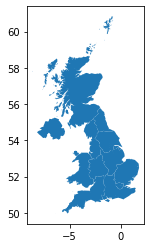

In [ ]:
gdf.plot()

coordinate reference system= epsg:4326


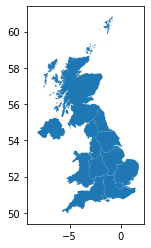

In [ ]:
# merge both dataframes
uk_gdf = gpd.GeoDataFrame(
    uk.merge(
        gdf[['region_name','rgn19cd','geometry']],
        how='left',
        on='region_name'),
    crs=gdf.crs)

# set index to region_name as they are unique
uk_gdf.set_index('region_name',inplace=True)

# check crs and plot map
print("coordinate reference system= " + str(uk_gdf.crs))
uk_gdf.plot()

In [ ]:
# geojson must be unwound before plotting
import json
!pip install geojson_rewind
from geojson_rewind import rewind

In [ ]:
#Populate uk_gdf['properties'] (i.e. convert to plotly-readible geojson-type)
uk_gdf_unwound = json.loads(uk_gdf.to_json())

# rewind the unwound geojson
uk_gdf_rewound = rewind(uk_gdf_unwound,rfc7946=False)

In [ ]:
# set gdf index to region name
gdf.set_index('region_name',inplace=True)

#Populate gdf['properties'] (i.e. convert to plotly-readible geojson-type)
gdf_unwound = json.loads(gdf.to_json())

# rewind the unwound geojson
gdf_rewound = rewind(gdf_unwound,rfc7946=False)

In [47]:
uk_gdf.head().T

region_name,EAST_MIDLANDS,EAST_OF_ENGLAND,LONDON,NORTHERN_IRELAND,NORTH_EAST
adults_in_household,1.76516,1.7635,1.88008,1.70203,1.67179
children_in_household,0.526439,0.485413,0.675048,0.553297,0.512821
country,0,0,0,0,0
household_equivalisation_ahc,0.945334,0.934413,0.941741,0.928052,0.904359
household_equivalisation_bhc,0.975078,0.964749,0.977602,0.962231,0.941282
household_id,1.09734e+06,1.09643e+06,1.0952e+06,1.09726e+06,1.09357e+06
household_weight,1556.18,1599.68,2268.67,363.697,1489.42
in_poverty_ahc,0.0902022,0.0924891,0.168279,0.0505702,0.120513
in_poverty_bhc,0.0979782,0.0856611,0.110896,0.0614774,0.10641
people_in_household,2.2916,2.24891,2.55513,2.25533,2.18462


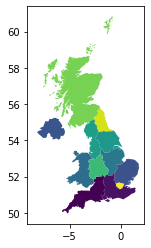

In [ ]:
uk_gdf.plot("is_social")

In [94]:
uk_gdf.head()

,adults_in_household,children_in_household,country,household_equivalisation_ahc,household_equivalisation_bhc,household_id,household_weight,in_poverty_ahc,in_poverty_bhc,people_in_household,region,seniors_in_household,working_age_adults_in_household,council_tax,housing_costs,housing_type,is_rented,is_shared,is_social,mortgage,num_rooms,rent,weekly_rent,equiv_household_net_income,equiv_household_net_income_ahc,household_earnings,household_income,household_net_income,household_net_income_ahc,household_basic_income,rgn19cd,geometry
region_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
EAST_MIDLANDS,1.765163,0.526439,0,0.945334,0.975078,1097335.459,1556.18430,0.090202,0.097978,2.291602,3,0.501555,1.267496,1407.4058,60.281494,1,0.0,0.009331,0.181182,0.0,5.619751,36.851480,0.0,31475.969,29537.203,26490.725,31881.984,31016.275,27902.057,281.43470,E12000004,"MULTIPOLYGON (((-0.30000 53.61000, -0.31000 53..."
EAST_OF_ENGLAND,1.763501,0.485413,0,0.934413,0.964749,1096434.240,1599.67720,0.092489,0.085661,2.248914,5,0.543762,1.227188,1554.0565,75.962135,1,0.0,0.004966,0.162632,0.0,5.540658,43.464310,0.0,34265.848,31697.924,31410.242,37668.240,33325.742,29397.370,279.03476,E12000006,"MULTIPOLYGON (((1.00000 52.98000, 0.99000 52.9..."
LONDON,1.880077,0.675048,0,0.941741,0.977602,1095200.471,2268.67070,0.168279,0.110896,2.555126,6,0.348807,1.549968,1599.5667,154.000640,1,0.0,0.014184,0.256609,0.0,4.642166,115.067696,0.0,41817.690,35981.836,44744.920,48651.914,40440.273,32769.070,298.47678,E12000007,"MULTIPOLYGON (((0.02000 51.64000, -0.19000 51...."
NORTHERN_IRELAND,1.702033,0.553297,0,0.928052,0.962231,1097263.114,363.69708,0.050570,0.061477,2.255330,11,0.449678,1.270699,0.0000,43.780860,1,0.0,0.005949,0.164105,0.0,5.918691,31.010412,0.0,31586.360,30767.943,22867.264,26461.719,30543.742,28272.049,277.49753,N92000002,"MULTIPOLYGON (((-6.48000 55.25000, -6.49000 55..."
NORTH_EAST,1.671795,0.512821,0,0.904359,0.941282,1093567.859,1489.41660,0.120513,0.106410,2.184615,0,0.471795,1.207692,1273.2363,59.735897,1,0.0,0.005128,0.248718,0.0,5.346154,37.964104,0.0,29604.121,27737.312,21515.450,25803.982,28021.390,24925.527,267.13943,E12000001,"MULTIPOLYGON (((-2.03000 55.77000, -2.02000 55..."


# Region Choropleth Function

In [51]:
def region_choropleth(data,var):
  """data must be geopandas geodataframe for now"""

  fig = go.Figure(px.choropleth(
      gpdata,
      geojson = gdf_rewound,
      locations=gdf.index,
      projection='mercator',
      color=var,
      color_continuous_scale="Viridis"
      # featureidkey='properties.region_name'
  ))

  fig.update_geos(
      projection_type="mercator",
      fitbounds="locations",
      visible=False
  )

  fig.update_layout(
      plot_bgcolor="#323130",
      height=300,
      margin={"r":0,"t":0,"l":0,"b":0}
      )

  fig.show()

region_choropleth(uk_gdf,'equiv_household_net_income_ahc')

In [96]:
fig= go.Figure()

fig.add_trace(px.choropleth(
      uk_gdf,
      geojson = gdf_rewound,
      locations=gdf.index,
      projection='mercator',
      color='equiv_household_net_income_ahc',
      color_continuous_scale="Viridis"
      # featureidkey='properties.region_name'
  ))

fig.add_trace(px.choropleth(
      uk_gdf,
      geojson = gdf_rewound,
      locations=gdf.index,
      projection='mercator',
      color='equiv_household_net_income',
      color_continuous_scale="Viridis",
      visibile=False
      # featureidkey='properties.region_name'
  ))

fig.update_geos(
      projection_type="mercator",
      fitbounds="locations",
      visible=False
  )

fig.update_layout(
      plot_bgcolor="#323130",
      height=300,
      margin={"r":0,"t":0,"l":0,"b":0}
      )



# from nate's code

fig.update_layout(
    updatemenus=[go.layout.Updatemenu(
        active=0,
        buttons=list([
            dict(label="ahc",
                 method="update",
                 args=[{'visible':[True,False,False,False,False,False]},
                       {'title':'Average student debt by race',
                        'showlegend':True}]),
            dict(label="non-ahc",
                 method="update",
                 args=[{'visible':[False,True,False, False,False, False]},
                       {'title':'Average student debt by education level',
                        'showlegend':True}]),
            # dict(label="Age",
            #      method="update",
            #      args=[{'visible':[False,False,True, False, False, False]},
            #            {'title':'Average student debt by age',
            #             'showlegend':True}]),
            # dict(label="Income",
            #      method="update",
            #      args=[{'visible':[False,False,False, True, False, False]},
            #            {'title':'Average student debt by income quintile',
            #             'showlegend':True}]),
            # dict(label="Networth",
            #      method="update",
            #      args=[{'visible':[False,False,False, False, True, False]},
            #            {'title':'Average student debt by net worth quintile',
            #             'showlegend':True}]),
            # dict(label="Poverty Status",
            #      method="update",
            #      args=[{'visible':[False,False,False, False, False, True]},
            #            {'title':'Average student debt by poverty status',
            #             'showlegend':True}]), 
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=-0.35,
            xanchor="left",
            y=1.1,
            yanchor="top"
    
    )])


fig.show()

ValueError: ignored

# Dash


In [63]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
app = dash.Dash()


In [71]:
with open("/content/app.py", "w") as writefile:
  writefile

In [59]:
# file ="https://drive.google.com/file/d/19xeIpigGi9ti51_GfJuRCb9GKv4nR0dB/view"
# file = "https://docs.google.com/spreadsheets/d/1V79tCEJgVZeEYM3KOZFl8BJCrs5YUDtFuxXXr1SlE34/edit#gid=1646921341"
# file= "https://drive.google.com/file/d/19xeIpigGi9ti51_GfJuRCb9GKv4nR0dB/view?usp=sharing"
file = "/content/intro_bees.csv"

df= pd.read_csv(file)
# # open workbook by url
# wb = gc.open_by_url(file)
# # call first sheet
# sheet = wb.sheet1
# # get values from sheet object
# data = sheet.get_all_values()

# bees = pd.DataFrame(data)
# bees.columns = bees.iloc[0]
# bees = bees.iloc[1:]

df.head()

,Program,Year,Period,State,ANSI,Affected by,Pct of Colonies Impacted,state_code
0,SURVEY,2019,JAN THRU MAR,Alabama,1,Disease,1.8,AL
1,SURVEY,2019,JAN THRU MAR,Alabama,1,Other,3.1,AL
2,SURVEY,2019,JAN THRU MAR,Alabama,1,Pesticides,0.3,AL
3,SURVEY,2019,JAN THRU MAR,Alabama,1,Pests_excl_Varroa,22.7,AL
4,SURVEY,2019,JAN THRU MAR,Alabama,1,Unknown,9.0,AL


In [60]:
df = df.groupby(['State', 'ANSI', 'Affected by', 'Year', 'state_code'])[['Pct of Colonies Impacted']].mean()
df.reset_index(inplace=True)
print(df[:5])

     State  ANSI Affected by  Year state_code  Pct of Colonies Impacted
0  Alabama     1     Disease  2015         AL                      0.05
1  Alabama     1     Disease  2016         AL                      1.20
2  Alabama     1     Disease  2017         AL                      2.25
3  Alabama     1     Disease  2018         AL                      1.30
4  Alabama     1     Disease  2019         AL                      1.80


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   State                     1350 non-null   object 
 1   ANSI                      1350 non-null   int64  
 2   Affected by               1350 non-null   object 
 3   Year                      1350 non-null   int64  
 4   state_code                1350 non-null   object 
 5   Pct of Colonies Impacted  1350 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 63.4+ KB


In [79]:
%%netsh http add iplisten 127.0.0.1

UsageError: Cell magic `%%netsh` not found.


In [88]:
from dash.dependencies import Input, Output 

In [89]:
!python app.py

In [90]:
app.layout = html.Div([
    html.H1("THE BEES"), # title
    dcc.Dropdown(
        id="slct_year",
        options=[
                 {"label": "2015", "value": 2015},
                 {"label": "2016", "value": 2016},
                 {"label": "2017", "value": 2017},
                 {"label": "2018", "value": 2018}],
        multi=False,
        value=2015,
        style={"width":"40%"}),
    html.Div(id='output_container', children=[]),

    dcc.Graph(figure=fig),
    html.Br(), # break between div and graph

    dcc.Graph(id='my_bee_map', figure={})
])

# Connect the Plotly graphs with Dash Components
@app.callback(
    [Output(component_id='output_container', component_property='children'),
     Output(component_id='my_bee_map', component_property='figure')],
    [Input(component_id='slct_year', component_property='value')]
)
def update_graph(option_slctd):
    print(option_slctd)
    print(type(option_slctd))

    container = "The year chosen by user was: {}".format(option_slctd)

    dff = df.copy()
    dff = dff[dff["Year"] == option_slctd]
    dff = dff[dff["Affected by"] == "Varroa_mites"]

    # Plotly Express
    fig = px.choropleth(
        data_frame=dff,
        locationmode='USA-states',
        locations='state_code',
        scope="usa",
        color='Pct of Colonies Impacted',
        hover_data=['State', 'Pct of Colonies Impacted'],
        color_continuous_scale=px.colors.sequential.YlOrRd,
        labels={'Pct of Colonies Impacted': '% of Bee Colonies'},
        template='plotly_dark'
    )

    # Plotly Graph Objects (GO)
    # fig = go.Figure(
    #     data=[go.Choropleth(
    #         locationmode='USA-states',
    #         locations=dff['state_code'],
    #         z=dff["Pct of Colonies Impacted"].astype(float),
    #         colorscale='Reds',
    #     )]
    # )
    #
    # fig.update_layout(
    #     title_text="Bees Affected by Mites in the USA",
    #     title_xanchor="center",
    #     title_font=dict(size=24),
    #     title_x=0.5,
    #     geo=dict(scope='usa'),
    # )

    return container, fig


app.run_server(debug=False, use_reloader=False)  # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


OSError: ignored

In [ ]:
region_choropleth(uk_gdf,'equiv_household_net_income_ahc')

# Plotly Bar Chart

<a id="4"></a> <br>
# Bar Charts

* Import graph_objs as *go*
* Creating traces
    * x = x axis
    * y = y axis
    * mode = type of plot like marker, line or line + markers
    * name = name of the plots
    * marker = marker is used with dictionary. 
        * color = color of lines. It takes RGB (red, green, blue) and opacity (alpha)
        * line = It is dictionary. line between bars
            * color = line color around bars
    * text = The hover text (hover is curser)
* data = is a list that we add traces into it
* layout = it is dictionary.
    * barmode = bar mode of bars like grouped
* fig = it includes data and layout
* iplot() = plots the figure(fig) that is created by data and layout

In [49]:
fig = go.Figure(data=
    [go.Bar(
        x=uk_gdf.index,
        y=uk_gdf.equiv_household_net_income_ahc),
     go.Bar(
         name = 'before ahc',
         x=uk_gdf.index,
         y=uk_gdf.equiv_household_net_income
     )])

# Change the bar mode
fig.update_layout(barmode='group')

fig.show()

# Counties and Unitary Authories

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [ ]:
bound = gpd.read_file("/content/Counties_and_Unitary_Authorities__December_2016__Boundaries.geojson")


In [ ]:
bound.head()

In [ ]:
bound.info()

In [ ]:
bound.plot()

In [ ]:
gpd.read_file("/content/adc.json")

In [ ]:
! kaggle datasets download -d dorianlazar/uk-regions-geojson

In [ ]:
file = "https://drive.google.com/file/d/1vGQD2NPQpkPSWI0WWsP5ixR1qUMQOXoU/view?usp=sharing"



# open workbook by url
wb = gc.open_by_url(file)
# call first sheet
sheet = wb.sheet1
# get values from sheet object
data = sheet.get_all_values()
data

# regions = gpd.read_file(file)
# regions